In [54]:
import pandas as pd

In [55]:
df = pd.read_csv('United Nations Refugee Data - Spain.csv', delimiter=";")

In [122]:
df_grupped = df.groupby(['Country of origin', 'Year'])['refugees_number'].sum().unstack()
df_grupped

Year,2022,2023
Country of origin,,
Afghanistan,2740,3355
Mali,5357,7082
Syria,16670,17205
Ukraine,159194,177768
Venezuela,105054,134554


In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Recurs utilitzat: https://python-graph-gallery.com/web-slope-chart-matplotlib/

In [165]:
def add_label(continent_name, year, df):
    
    # Calculate value (and round it)
    if continent_name == "Afghanistan":
        y_position = round(df[year][continent_name]) - 4000
        y_value = round(df[year][continent_name])
    else:
        y_position = round(df[year][continent_name])
        y_value = round(df[year][continent_name])
    
    # Determine x_position depending on the year  
    if year==2022:
        x_position = year - 0.45
    else:
        x_position = year + 0.05
    
    # Adding the text
    plt.text(x_position, # x-axis position
             y_position, #y-axis position
             f'{continent_name}, {y_value}', # Text
             fontsize=12, # Text size
             color='black', # Text color
            ) 

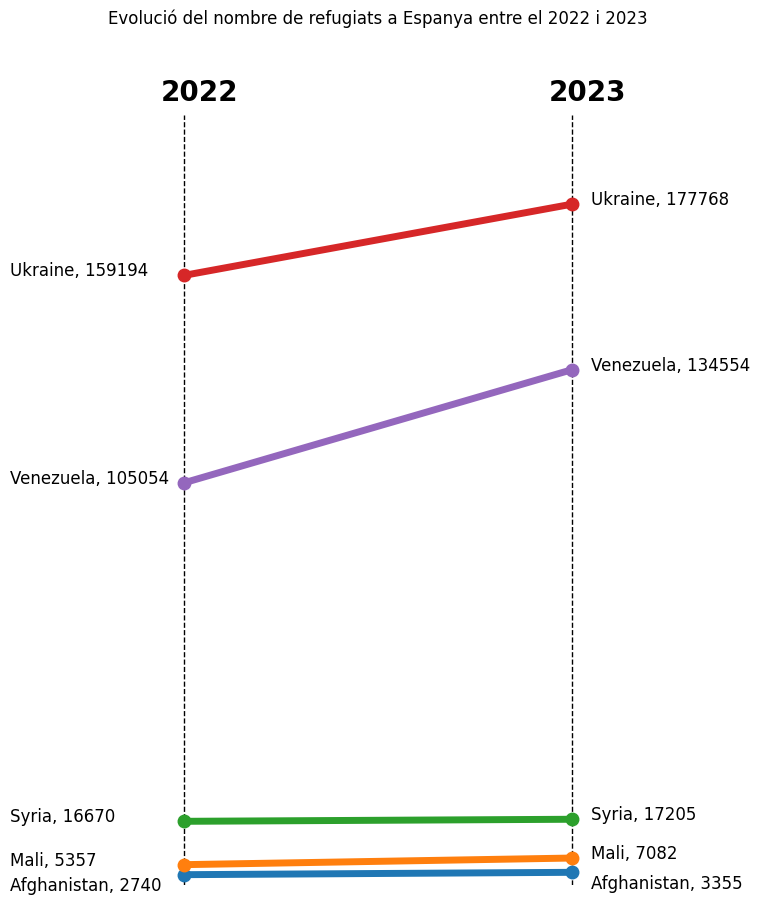

In [170]:
years = list(set(df['Year']))

# Definim mida de la figura
plt.figure(figsize=(6, 10))

# Eixos verticals dels nostres anys
plt.axvline(x=years[0], color='black', linestyle='--', linewidth=1) # 2022
plt.axvline(x=years[1], color='black', linestyle='--', linewidth=1) # 2023


# Add 2022 i 2023
plt.text(2021.94, 205000, '2022', fontsize=20, color='black', fontweight='bold')
plt.text(2022.94, 205000, '2023', fontsize=20, color='black', fontweight='bold')

for country in df_grupped.index:

    # Línia per a cada país
    plt.plot(years, df_grupped.loc[country], marker='o', label=country, linewidth=5, markersize=9)

# Add label of each continent at each year
for country in df_grupped.index:
    for year in df_grupped.columns:
        add_label(country, year, df_grupped)

plt.title(f'Evolució del nombre de refugiats a Espanya entre el 2022 i 2023\n\n\n\n')

# Dilimitem box
plt.xlim(2021.9,2023.1)
plt.ylim(0, 201000)
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.show()